# Lecture 8: Polynomial Interpolation

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

In [21]:
using Plots
using LaTeXStrings
using Polynomials
using PrettyTables

function f₁( x )
    return x + rand()
end

function f₂( x )
    return 1/( 1 + exp( x ) );
end

function f₃( x, α = 25 )
    return 1/( 1 + α*x^2 );
end

f₄ = t -> max(0, @. 1-abs(t) )

#33 (generic function with 1 method)

## Previously.....

* Chapter 1: Floating Point Numbers 
* Chapter 2: Solving Nonlinear Equations in 1d

## Chapter 3: Interpolation

* Before: solution was $\xi \in \mathbb R$, represented numerically as a floating point number
* Now: want to represent a function $f : [a,b] \to \mathbb R$ numerically (*discretisation problem*)

## Interpolation Problem:

Suppose that $X = \{ x_0 < \cdots < x_n \}$ is a set of distinct *interpolation nodes*, $0 \leq m_0, \dots, m_n \leq m$, and $f$ is an $m$ times differentiable function. 

***Aim***: find $p$ such that 

\begin{align}
    p(x_j) = f(x_j), \quad 
    %
    p'(x_j) = f'(x_j), \quad 
    %
    \cdots \quad
    %
    p^{(m_j)}(x_j) = f^{(m_j)}(x_j)
\end{align}

for all $j = 0, \dots, n$. *Lagrange interpolation* is when $m_0 = m_1 = \cdots = m_n = 0$

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example. (Taylor Polynomial)</strong> 

If $X = \{ x_0 \}$, then we can solve the interpolation problem with a polynomial of degree $m_0$:

\begin{align}
    p(x) = f(x_0) + f'(x_0)(x-x_0) + \cdots + \frac{f^{(m_0)}(x_0)}{m_0!}(x-x_0)^{m_0}
\end{align}

</div> 

<div class='alert alert-block alert-info'><b>Theorem (Lagrange Interpolation)</b> 

For $x_0 < \cdots < x_n$ (*nodes*) and a function $f$ defined on $X = \{x_0,\dots,x_n\}$, there exists a unique polynomial *interpolant* $I_Xf$ of degree at most $n$ such that $I_Xf(x_j) = f(x_j)$ for all $j=0,\dots,n$. 

</div> 

In the following, we will write $\mathcal P_n := \{p(x) = \sum_{j=0}^n a_j x^j \colon a_0, \dots,a_n \in \mathbb R\}$ for the set of polynomials of degree at most $n$.

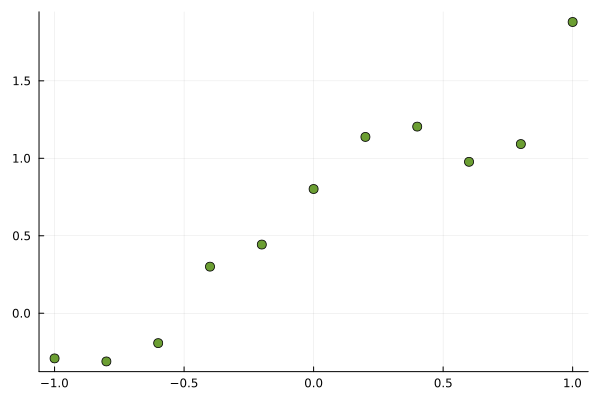

In [32]:
N = 10
X = range( -1, 1, N+1)
Y = f₁.(X)

scatter( X, Y, 
    primary = false, markersize = 5 )

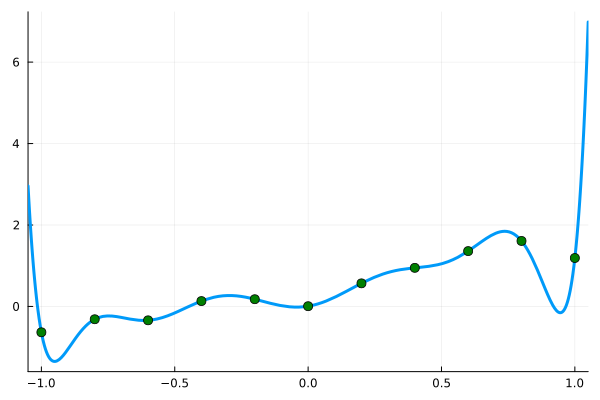

In [23]:
p = fit( X, Y )
plot( p , 
    xlims=(-1.05,1.05), legend = false, lw = 3)
scatter!( X, Y, 
    primary = false, markersize = 5, color="green")

<div class='alert alert-block alert-success'><b>Proof.</b> 
*Existence:* Use the *Lagrange polynomials*:

\begin{align}
    \ell_j(x) = \prod_{k\in\{0,\dots,n\}: \,\, k\not=j} \frac
        {x - x_k}
        {x_j - x_k}
\end{align}

which satsisfy $\ell_j \in \mathcal P_n$ and $\ell_j(x_k) = \delta_{jk}$ for all $j,k=0,\dots,n$.

Notice that 

\begin{align}
    p(x) = \sum_{j=0}^n \ell_j(x) f(x_j)
\end{align}

therefore satisfies $p(x_k) = \sum_{j=0}^n \ell_j(x_k) f(x_j) = \sum_{j=0}^n \delta_{jk} f(x_j) = f(x_k)$ for each $k=0,...,n$. That is $p$ solves the Lagrange interpolation problem. 

*Uniqueness:* suppose that $q \in \mathcal P_n$ interpolates $f$ at $X$. Then, $p - q$ has zeros at each $x_j$, we have that $x - x_j$ divides $p-q$: that is $p(x) - q(x) = \alpha (x - x_0)(x- x_1) \cdots (x - x_n)$. Since $p-q$ only has degree at most $n$, we must have $\alpha=0$ and thus $p = q$.
</div> 

[ Info: Saved animation to c:\Users\jack6\Math 5485\Pictures\Lagrange interpolating polynomials.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\Pictures\\Lagrange interpolating polynomials.gif")
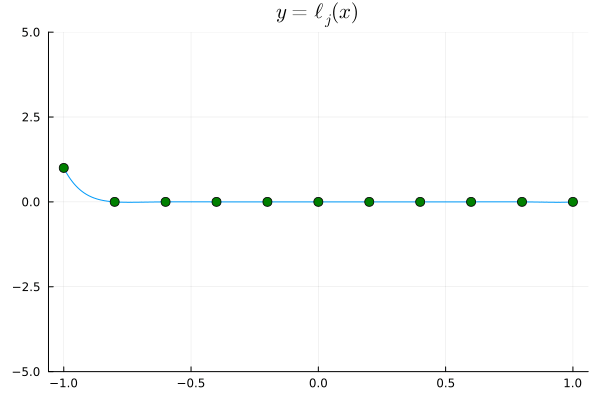

In [33]:
# X = @. cos( π*(0:N)/N )
X = range(-1,1,N+1)

function ℓ( j, x )
    r = 1;
    for n = 0:N
        if (n != j)
            r = r*(x - X[n+1]) / (X[j+1] - X[n+1])
        end
    end
    return r 
end

anim = @animate for j ∈ 0:N
    p = x -> ℓ(j, x)
    plot(p, -1, 1, 
        ylims = (-5, 5), legend = false )
    scatter!( X, p.(X), 
        primary = false, markersize = 5, color="green", title = L"y = \ell_{j}(x)")
end

gif(anim, "Pictures/Lagrange interpolating polynomials.gif", fps = 1)

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Exercise.</strong> 

Write down the polynomial of least degree interpolating $f(x) = \sin(x)$ at the points $0, \frac{\pi}{2}, \pi$

</div> 

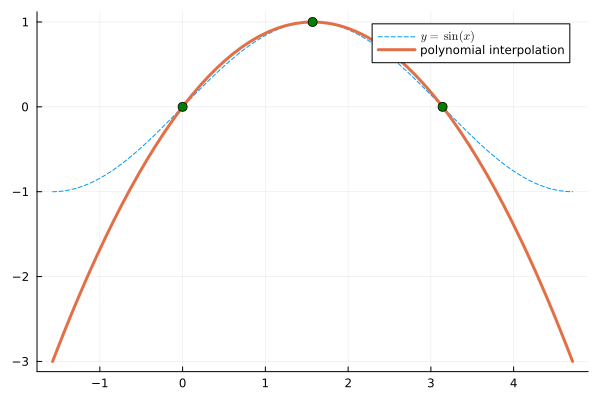

In [24]:
X = 0:(π/2):π
Y = sin.( X )

p = x -> -(4/π^2)*x*(x-π)

plot( x -> sin(x) , -π/2, 3π/2, linestyle=:dash, label = L"y = \sin(x)")
plot!( x -> p(x) , label = "polynomial interpolation" , lw = 3 )
scatter!( X, Y, 
    primary = false, markersize = 5, color="green")

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Suppose $f:[a,b]\to\mathbb R$ is $n+1$ times continuously differentiable and $X = \{x_0 < \dots < x_n\}$. Then, for all $x \in [a,b]$ there exists $\xi_x \in [\min \{x,x_0\} , \max \{x,x_n\}]$ such that 

\begin{align}
    f(x) - I_Xf(x) = \frac{f^{(n+1)}(\xi_x)}{(n+1)!} (x - x_0)(x-x_1) \cdots (x-x_n)
\end{align}

</div> 


<div class='alert alert-block alert-danger'><b>Remark.</b> Compare with Taylor remainder

</div> 

<div class='alert alert-block alert-success'><b>Proof (non-examinable).</b> 

For fixed $x \not\in X$, define the function 

\begin{align}
    g(t) = f(t) - I_Xf(t) - \big[ f(x) - I_Xf(x) \big] \prod_{j=0}^n \frac{t - x_j}{x-x_j}.  
\end{align}

Here, $g$ is an $n+1$ times continuously differentiable function with zeros at the $n+2$ distinct points $x, x_0, \dots, x_n$. As a result, by Rolle's theorem (if a differentiable function is zero at its end points, there exists an interior point with zero derivative - the proof follows in the same way as in the proof of the mean value theorem) $g'$ is zero at $n+1$ distinct points, $g''$ is zero at $n$ distinct points, ...., $g^{(n)}$ is zero at $2$ distinct points, and thus there exists $\xi_x \in [\min \{x\} \cup X, \max \{x\}\cup X]$ such that $g^{(n+1)}(\xi_x) = 0$:

\begin{align}
    0 &= g^{(n+1)}(\xi_x) \nonumber\\
      &= f^{(n+1)}(\xi_x) - (I_Xf)^{(n+1)}(\xi_x) - \big[ f(x) - I_Xf(x) \big] \frac{\mathrm{d}^{n+1}}{\mathrm{d}t^{n+1}} \prod_{j=0}^n\frac{t- x_j}{x-x_j}\Bigg|_{t = \xi_x} \nonumber\\
    &= f^{(n+1)}(\xi_x) - \big[ f(x) - I_Xf(x) \big] \frac{(n+1)!}{\prod_{j=0}^n(x-x_j)}
\end{align}

</div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Exercise.</strong> 

Write down an error estimate for approximating $f(x) = \sin(x)$ by $I_{\{0, \frac\pi2, \pi\}}f(x) = - \frac4{\pi^2} x (x - \pi)$.

</div> 

extreme values of q = ±1.4917901823282596


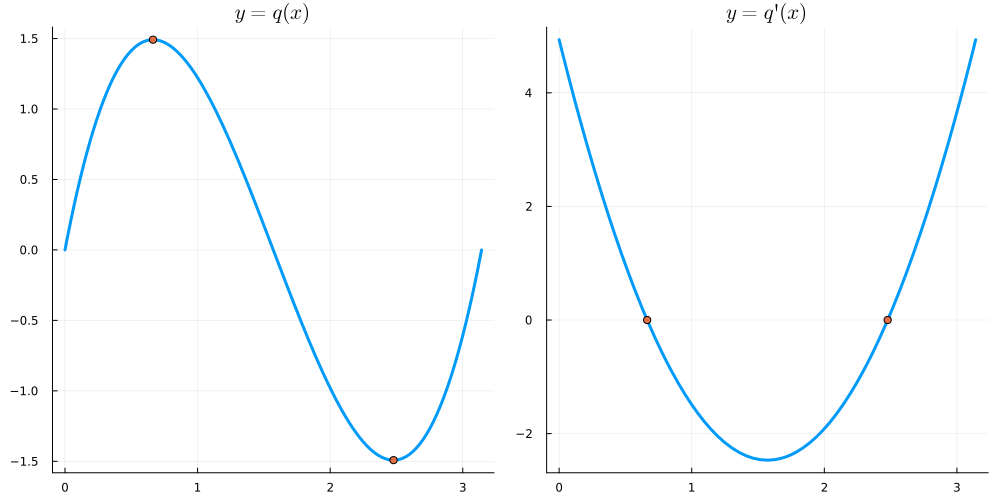

In [25]:
q = x -> x*(x-π/2)*(x-π) 
dq(x) = (x-π/2)*(x-π) + x*(x-π) + x*(x-π/2)

xpm = [ (1/2 + sqrt(3)/6)*π, (1/2 - sqrt(3)/6)*π ]

plt1 = plot( q, 0, π, lw = 3, title=L"y = q(x)", legend=false)
plt2 = plot( dq, 0, π, lw = 3, title=L"y = q'(x)", legend=false)

xpm = [ (1/2 - sqrt(3)/6)*π, (1/2 + sqrt(3)/6)*π ]

scatter!( plt1, xpm, q.(xpm) )
scatter!( plt2, xpm, dq.(xpm) )

println("extreme values of q = ±", q(xpm[1])  )
plot( plt1, plt2, size = (1000,500) )

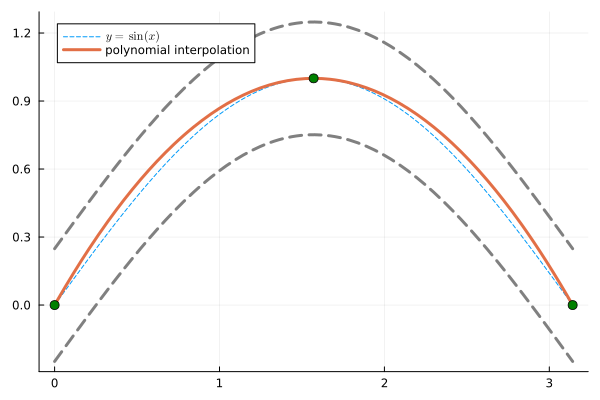

In [26]:
X = 0:(π/2):π
Y = sin.( X )

plot( x -> sin(x) , 0, π, linestyle=:dash, label=L"y = \sin(x)")
plot!( x -> p(x) , label = "polynomial interpolation" , lw = 3 )
scatter!( X, Y, 
    primary = false, markersize = 5, color="green")

err = q( xpm[2] )/6
plot!( x -> sin(x) + err, lw = 3, linestyle=:dash, color="gray", primary = false )    
plot!( x -> sin(x) - err, lw = 3, linestyle=:dash, color="gray", primary = false )    

In general, for $f:[a,b] \to \mathbb R$, $n+1$ times continuously differentiable and $X = \{x_0 < \dots < x_n \}\subset [a,b]$, we have 

\begin{align}
    \left| f(x) - I_Xf(x) \right| \leq \max_{\xi \in [a,b]} |f^{(n+1)}(\xi)| \frac{|\ell_X(x)|}{(n+1)!}  
\end{align}

where $\ell_X(x) := (x-x_0)(x-x_1)\cdots (x-x_n)$ is known as the *node polynomial*.

## Equispaced points

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Consider $f(x) = \frac{1}{1 + 25 x^2}$

</div> 

[ Info: Saved animation to c:\Users\jack6\Math 5485\Pictures\Runge.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\Pictures\\Runge.gif")
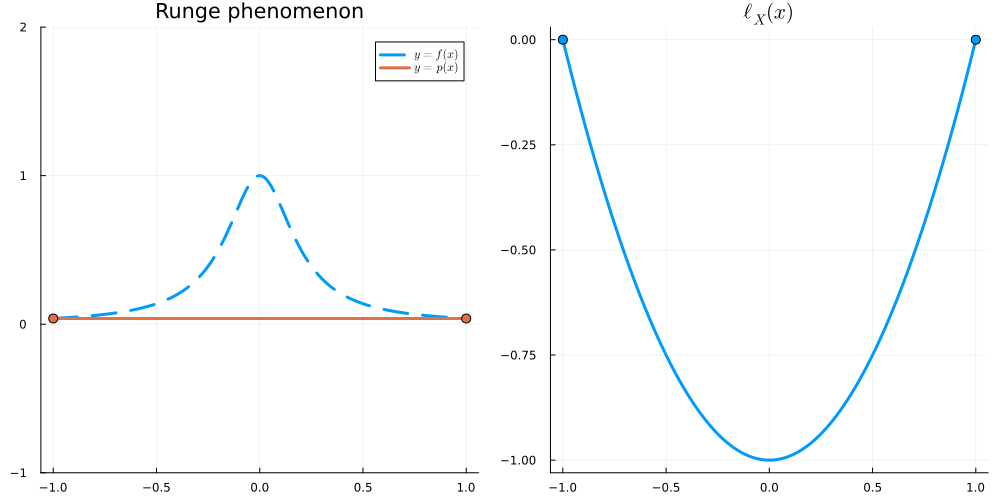

In [27]:
N = 20;

anim = @animate for n ∈ 2:N
    x = range(-1,1,n)
    y = @. f₃( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Runge phenomenon")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, ylims=(-1,2), markersize = 5)

    ℓ = fromroots( x )
    plt2 = plot(ℓ, -1, 1, title=L"\ell_X(x)", legend = false, lw = 3)
    scatter!(plt2, [x], [zeros(n)], primary = false, markersize = 5)

    plot( plt1, plt2, size=(1000, 500))

end

gif(anim, "Pictures/Runge.gif", fps = 1)

[ Info: Saved animation to c:\Users\jack6\Math 5485\Pictures\Runge.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\Pictures\\Runge.gif")
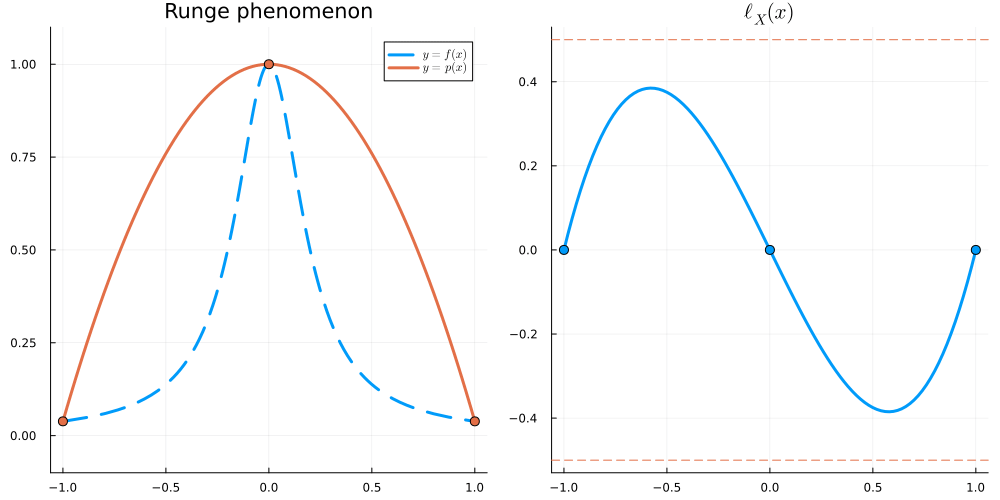

In [28]:
N = 25

err = zeros(N)
egrid = -1:.01:1

anim = @animate for n ∈ 2:N
    x = @. cos( π*(0:n)/n )
    y = @. f₃( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Runge phenomenon")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, ylims=(-.1,1.1), markersize = 5)

    ℓ = fromroots( x )
    plt2 = plot(ℓ, -1, 1, title=L"\ell_X(x)", legend = false, lw = 3)
    scatter!(plt2, [x], [zeros(n)], primary = false, markersize = 5)

    hline!(plt2, [2.0^(1-n), -2.0^(1-n)], linestyle=:dash )

    plot( plt1, plt2, size=(1000, 500))

    err[n] = maximum( @. abs( p(egrid) - f₃(egrid) ) )

end

gif(anim, "Pictures/Runge.gif", fps = 1)

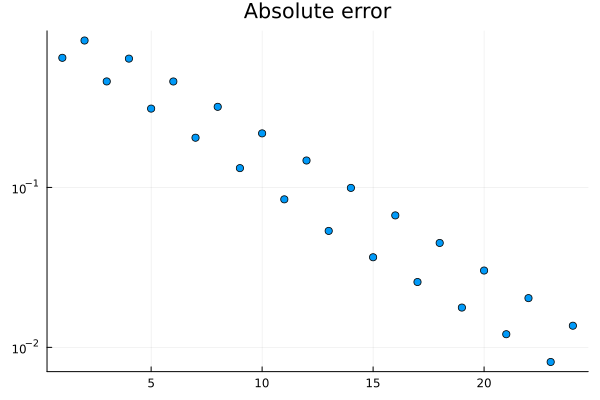

In [29]:
scatter( err[2:end],  yaxis= :log, title="Absolute error", legend=false, lw = 3)

[ Info: Saved animation to c:\Users\jack6\Math 5485\Pictures\Hat.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\Pictures\\Hat.gif")
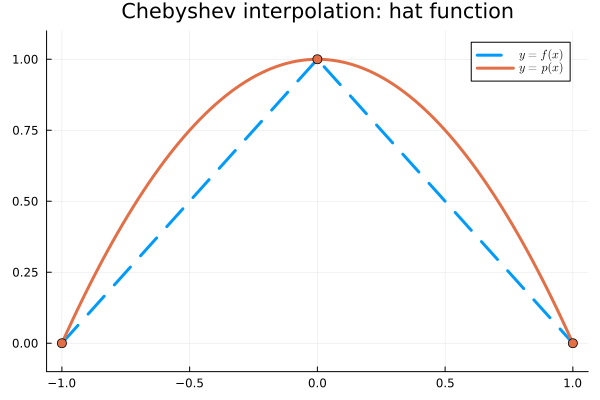

In [36]:
N = 25

err = zeros(N)
egrid = -1:.01:1

anim = @animate for n ∈ 2:N
    x = @. cos( π*(0:n)/n )
    y = @. f₄( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(f₄, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Chebyshev interpolation: hat function")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, ylims=(-.1,1.1), markersize = 5)

    err[n] = maximum( @. abs( p(egrid) - f₄(egrid) ) )

end

gif(anim, "Pictures/Hat.gif", fps = 1)

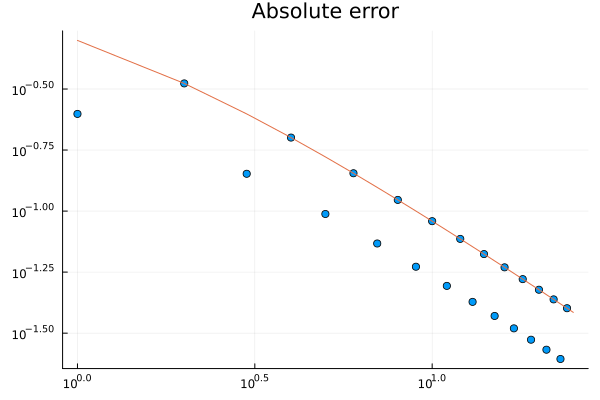

In [37]:
scatter( err[2:end],  xaxis= :log, yaxis= :log, title="Absolute error", legend=false, lw = 3)
plot!( (2:(N+1)).^(-1) )